In [197]:
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [198]:
start_time = time.time()

### Generating Data

In [199]:
# A simple function generating random predictors and responses!
def gen_data(start=2, end=100, step=2, add_noise=0):
    
    x = np.arange(start, end, step)
    y = np.add(np.multiply(x, 5), 10)
    #theta0 = 10, theta1 = 5
    
    if add_noise > 0:
        y = np.random.normal(y, add_noise)
        
    for i,v in enumerate(np.nditer(y)):
        if v < 0:
            y[i] = np.random.randint(low=start, high=end)
        
    return x, y

### Hypothesis Function

In [200]:
def calculate_hyp(x, params):
    
    h_of_x = np.multiply(x, params[1])
    h_of_x = np.add(h_of_x, params[0])
    
    return h_of_x

### Cost Function - Vectorized

In [201]:
def cost_function(x, y, params):
    
    m = len(y)    
    
    #hypothesis h(x)
    h_of_x = calculate_hyp(x, params)
    
    #performing calculations
    res = np.subtract(h_of_x, y)
    res = np.square(res)
    sum_of_squared_errors = np.sum(res)
    
    #calculating cost
    cost = np.divide(sum_of_squared_errors, np.multiply(m, 2))
    
    return cost

### Function to calculate Sum of Errors (formula) - Vectorized

In [202]:
def calculate_sum_of_errors(x, y, params, with_xi = False):
    
    m = len(y)
    sum_of_errors = 0
    
    if with_xi:
        #hypothesis h(x)
        h_of_x = calculate_hyp(x, params)
        
        #performing calculations
        res = np.subtract(h_of_x, y)
        res = np.multiply(res, x)
        sum_of_errors = np.sum(res)

    else:
        #hypothesis h(x)
        h_of_x = calculate_hyp(x, params)

        #performing calculations
        res = np.subtract(h_of_x, y)
        sum_of_errors = np.sum(res)
    
    return sum_of_errors

### Gradient Descent Function

In [203]:
def gradient_descent(x, y, params, alpha, precision=0.5 , iterations=0):
    
    m = len(y)
    cost_history = list()
    first_iteration = True
    iterations = 0
    
    while True:
        
        sum_of_errors = calculate_sum_of_errors(x, y, params)
        sum_of_errors_xi = calculate_sum_of_errors(x, y, params, with_xi=True)
        
        temp0 = params[0] - alpha * 1/m * sum_of_errors
        temp1 = params[1] - alpha * 1/m * sum_of_errors_xi
                
        if np.isinf(temp0) or np.isinf(temp1):
            break
        
        params[0] = temp0
        params[1] = temp1
    
        curr_cost = cost_function(x, y, params)
                
#         print("theta0 = {} | theta1 = {} | curr_cost = {}".format(params[0],params[1], curr_cost))
            
        if curr_cost < precision:
            break
        
        
        if not(first_iteration) and (cost_history[-1] - curr_cost <= precision):
            break
        
        if first_iteration:
            first_iteration = False
    
        cost_history.append(curr_cost)
    
        iterations += 1
        
    return params, cost_history, iterations

### Intitializing the data variables

In [204]:
x, y = gen_data(start=2, end=200, add_noise=50)

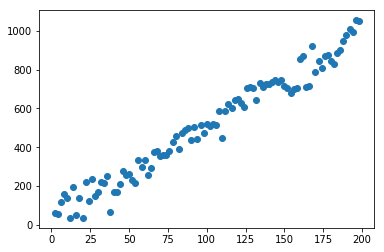

In [205]:
plt.scatter(x, y)

### Calculating cost on custom parameters

In [206]:
params = [1,1]
cost_function(x,y, params)

108621.31957080474

### Running the Gradient Descent

In [207]:
params = [1,1]
theta, cs, its = gradient_descent(x, y, params,precision=0.0000001, alpha=0.0001)

In [208]:
print("theta0 = {} | theta1 = {}".format(theta[0], theta[1]))

theta0 = 34.492324383689734 | theta1 = 4.76710165578385


### Plotting the regression line on newly obtained parameters from Gradient Descent

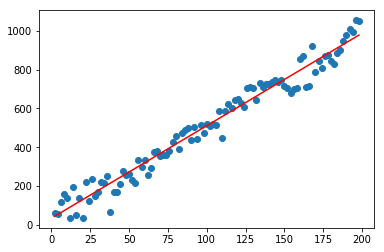

In [209]:
y_updated = theta[0] + theta[1]*x
plt.scatter(x, y)
plt.plot(x, y_updated, color='r')

### Adding an outlier - high leverage point

In [210]:
x = np.concatenate((x,[80]))

In [211]:
y_w_outlier = np.concatenate((y,[-50]))

In [212]:
params = [1,1]
theta, cs, its = gradient_descent(x, y_w_outlier, params,precision=0.000001, alpha=0.0006)


In [213]:
print("theta0 = {} | theta1 = {}".format(theta[0], theta[1]))

theta0 = -0.40733598148747285 | theta1 = -186.1245733834512


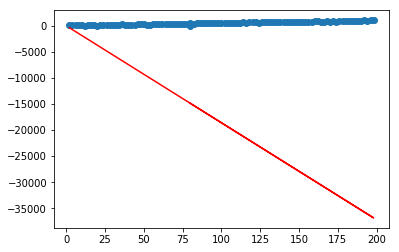

In [214]:
y_updated = theta[0] + theta[1]*x
plt.scatter(x, y_w_outlier)
plt.plot(x, y_updated, color='r')

In [215]:
print("Total time taken by program: {} seconds ".format((time.time() - start_time)))

Total time taken by program: 17.013980627059937 seconds 
